# Simulated Data

Fix time
pylint style
pylint ___.py 
y ~  1 + C1 + R1
at time 1: b1,b2,b3 (b1 has time --> time as x)
look at different treatments & sums coding
center and normalize continuous varaibles
crossing scale 

In [56]:
# imports
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.formula.api import OLS
import statsmodels.api as sm

from eegr import sim_data as sd
from eegr import fit_bucket as fb
import matplotlib.pyplot as plt
import statsmodels.graphics.regressionplots as sgr
import seaborn as sns

### Examining dataframe

#### Creating sample dataframe

In [101]:
epoch_p = (1,6)
time_p = (0,9,1)
cat_p = [(0,9),(5,2)]
cont_p = [(0,1)]

In [102]:
sample_df = sd.df_gen(epoch_p=epoch_p, time_p=time_p, cat_p=cat_p, cont_p=cont_p)

In [103]:
times = sample_df.index.levels[sample_df.index.names.index('Time')].tolist()
times_temp = np.concatenate([np.tile(x,len(set(sample_df.cat))) for x in times])
times = np.tile(times_temp,len(sample_df.index.levels[sample_df.index.names.index('Epoch_idx')]))
sample_df['times'] = times

#### making fit_grids

In [104]:
LHS = ["data"]
RHS = "cat -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


Examining the coefficients

### Plotting

Completing times x data

In [105]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]

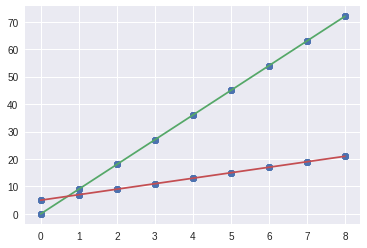

In [65]:
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']), line1,
         np.unique(sample_df['times']), line2)

In [30]:
cooks_d = [num for num in fit_grids[0][i][0]['diag']['cooks_d'] 
           for i in range(fit_grids[0].shape[0])]

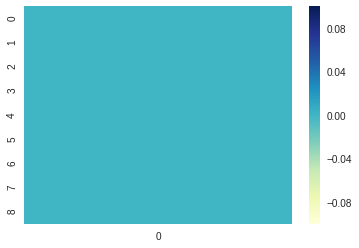

In [33]:
_ = sns.heatmap(np.asarray(cooks_d).reshape((fit_grids[0].shape[0],1)),
            cmap= "YlGnBu")

### Add in random continuous predictor with mean 0 and 1

In [67]:
LHS = ["data"]
RHS = "cat + cont_1_range0_1 -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


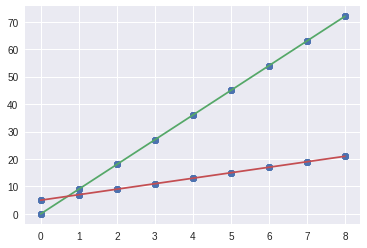

In [68]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]

_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']), line1,
         np.unique(sample_df['times']), line2)

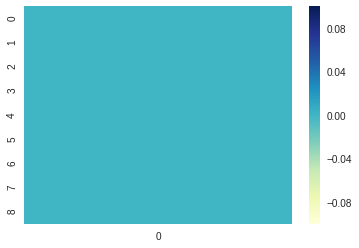

In [37]:
cooks_d = [num for num in fit_grids[0][i][0]['diag']['cooks_d'] 
           for i in range(fit_grids[0].shape[0])]
_ = sns.heatmap(np.asarray(cooks_d).reshape((fit_grids[0].shape[0],1)),
            cmap= "YlGnBu")

### Using different types of coding

#### Diff
Backward different coding - useful for ordered factors, and compares the mean of each level with the preceding level. So you get the second level minus the first, 3rd-2nd etc.

In [69]:
LHS = ["data"]
RHS = "C(cat, Diff) + -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [70]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]

In [71]:
line1

[2.5, 8.0, 13.5, 19.0, 24.5, 30.0, 35.5, 41.0, 46.5]

In [72]:
line2

[5.0, -2.0, -9.0, -16.0, -23.0, -30.0, -37.0, -44.0, -51.0]

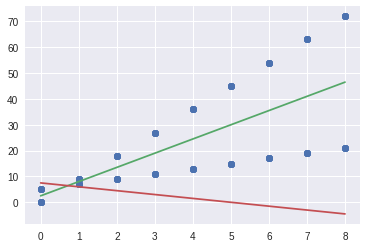

In [78]:
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']), line1,
         np.unique(sample_df['times']), 
                   [x + y for x, y in zip(line1, line2)])

#### Balanced

In [79]:
LHS = ["data"]
RHS = "C(cat, Poly) + -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [80]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line1, line2

([2.5, 8.0, 13.5, 19.0, 24.5, 30.0, 35.5, 41.0, 46.5],
 [3.535534,
  -1.4142135,
  -6.363961,
  -11.313708,
  -16.263456,
  -21.213203,
  -26.16295,
  -31.112698,
  -36.062447])

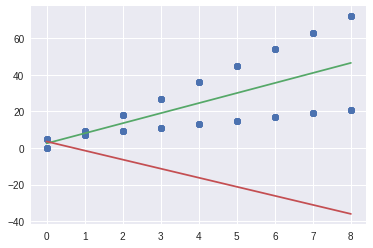

In [82]:
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']), line1,
         np.unique(sample_df['times']), line2)

#### sums

In [83]:
LHS = ["data"]
RHS = "C(cat, Sum) + -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [84]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line1, line2

([2.5, 8.0, 13.5, 19.0, 24.5, 30.0, 35.5, 41.0, 46.5],
 [-2.5, 1.0, 4.5, 8.0, 11.5, 15.0, 18.5, 22.0, 25.5])

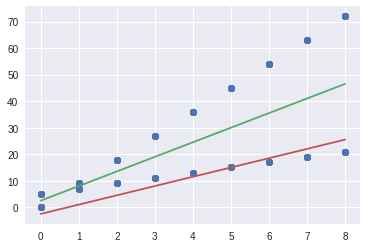

In [90]:
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']), line1,
         np.unique(sample_df['times']), line2)

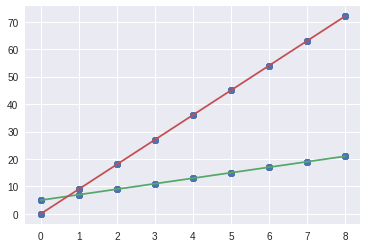

In [92]:
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']),
                   [x - y for x, y in zip(line1, line2)],
         np.unique(sample_df['times']), 
                   [x + y for x, y in zip(line1, line2)])

#### Helmert
compares the second level with the first and third with the average of the first two and so on.

In [94]:
LHS = ["data"]
RHS = "C(cat, Helmert) + -1"
fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

subid: testing1


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [95]:
line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
         for i in (fit_grids[0][x][0]['fit']['coef'])]
line1, line2

([2.5, 8.0, 13.5, 19.0, 24.5, 30.0, 35.5, 41.0, 46.5],
 [2.5, -1.0, -4.5, -8.0, -11.5, -15.0, -18.5, -22.0, -25.5])

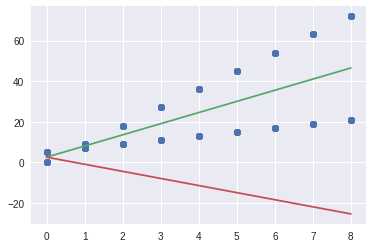

In [96]:
_ = plt.plot(sample_df['times'],sample_df['data'],'o',
         np.unique(sample_df['times']), line1,
         np.unique(sample_df['times']), line2)

#### 3 lines

In [121]:
epoch_p = (1,6)
time_p = (0,9,1)
cat_p = [(0,9),(5,2),(3,8)]
cont_p = [(0,1)]
sample_df = sd.df_gen(epoch_p=epoch_p, time_p=time_p, cat_p=cat_p, cont_p=cont_p)

times = sample_df.index.levels[sample_df.index.names.index('Time')].tolist()
times_temp = np.concatenate([np.tile(x,len(set(sample_df.cat))) for x in times])
times = np.tile(times_temp,len(sample_df.index.levels[sample_df.index.names.index('Epoch_idx')]))
sample_df['times'] = times

In [123]:
def plot_dif_scheme(sample_df, coding_scheme):
    LHS = ["data"]
    RHS = "C(cat, " + str(coding_scheme) + ") + -1"
    fit_grids = fb.make_fit_table(sample_df,LHS,RHS)

    line1 = [i[0] for x in range(fit_grids[0].shape[0]) 
             for i in (fit_grids[0][x][0]['fit']['coef'])]
    line2 = [i[1] for x in range(fit_grids[0].shape[0]) 
             for i in (fit_grids[0][x][0]['fit']['coef'])]
    line3 = [i[2] for x in range(fit_grids[0].shape[0]) 
             for i in (fit_grids[0][x][0]['fit']['coef'])]
    _ = plt.plot(sample_df['times'],sample_df['data'],'o',
             np.unique(sample_df['times']), line1,
             np.unique(sample_df['times']), line2,
             np.unique(sample_df['times']), line3)

subid: testing1


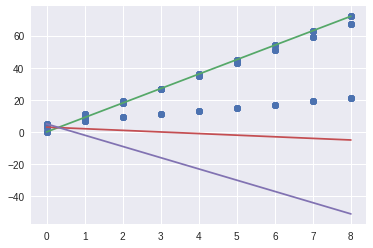

In [124]:
plot_dif_scheme(sample_df, 'Treatment')

subid: testing1


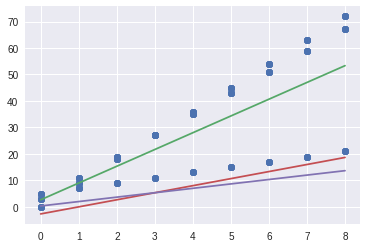

In [125]:
plot_dif_scheme(sample_df,'Sum')

subid: testing1


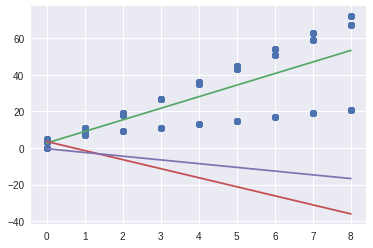

In [126]:
plot_dif_scheme(sample_df,'Poly')

subid: testing1


/usr/local/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in true_divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


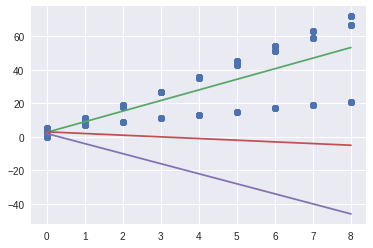

In [127]:
plot_dif_scheme(sample_df,'Diff')

subid: testing1


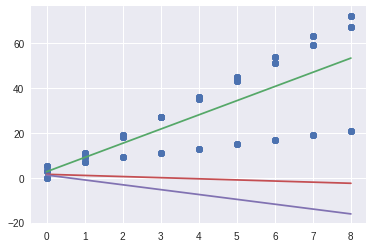

In [128]:
plot_dif_scheme(sample_df,'Helmert')